In [5]:
# Imports
import astropy.constants as c
import astropy.units as u
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc('font',size=20)

In [6]:
# Parameters
#outputDir='../../../output/Hen15/'
outputDir='../../../output/Hen15_betaprof_fixinfall_DI/'
filePrefix='SA_output_'
filePostfix='.h5'
snap='58'
firstFile=0
lastFile=9
xmin=1e9
xmax=1e12
ymin=1e5
ymax=1e11
massRatio=0.001

In [7]:
# First determine the size of the arrays that we need to hold the data
nGal=0
for iFile in range(firstFile,lastFile+1):
    # The following line closes the file at the end of the loop
    with h5py.File(outputDir+filePrefix+'%i'%iFile+filePostfix,'r') as f:
        nGal+=len(f[snap])
print('nGal=',nGal)

# Declare numpy arrays to hold the data
Type=np.empty(nGal)
BlackHoleMass=np.empty(nGal)
BulgeMass=np.empty(nGal)
StellarMass=np.empty(nGal)
Vvir=np.empty(nGal)

# Now read in the data
iGal=0
for iFile in range(firstFile,lastFile+1):
    # The following line closes the file at the end of the loop
    with h5py.File(outputDir+filePrefix+'%i'%iFile+filePostfix,'r') as f:
        nGalFile=len(f[snap])
        Type[iGal:iGal+nGalFile]=f[snap]['Type']
        BlackHoleMass[iGal:iGal+nGalFile]=f[snap]['BlackHoleMass']
        BulgeMass[iGal:iGal+nGalFile]=f[snap]['BulgeMass']
        StellarMass[iGal:iGal+nGalFile]=f[snap]['StellarMass']
        Vvir[iGal:iGal+nGalFile]=f[snap]['Vvir']
        iGal+=nGalFile

nGal= 80608


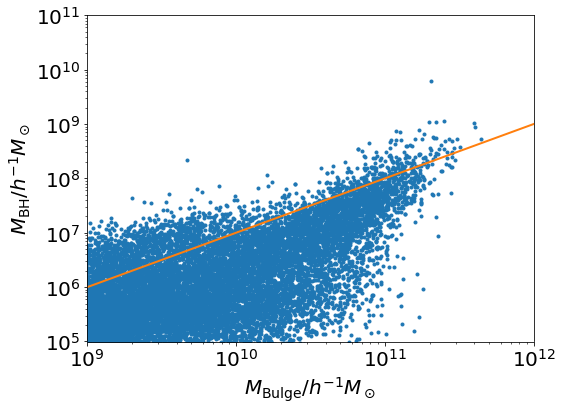

In [8]:
# Plot star-formation efficiency for central galaxy in halos (Type==0)
index0=np.where(Type==0)[0]
# Virial temperatue of halo in keV
plt.figure(0,figsize=(8,6))
plt.loglog(BulgeMass[index0]*1e10,BlackHoleMass[index0]*1e10,'.')
plt.xlabel(r'$M_\mathrm{Bulge}/h^{-1}M_\odot$')
plt.ylabel(r'$M_\mathrm{BH}/h^{-1}M_\odot$')
plt.plot([xmin,xmax],[massRatio*xmin,massRatio*xmax])
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.savefig('figs/BHBulge_'+outputDir.split('/')[-2]+'.png')